## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


In [2]:
# Combine the data into a single dataset
complete_data=pd.merge(study_results,mouse_metadata,on='Mouse ID',how='left')

# Display the data table for preview
complete_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [3]:
# Checking the number of mice.
number_of_mice=len(complete_data['Mouse ID'].unique())
number_of_mice

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
time_points=complete_data["Timepoint"].value_counts()
number_of_time_ID_appears=complete_data['Mouse ID'].value_counts()
number_of_time_ID_appears=number_of_time_ID_appears.reset_index()
# duplicate_mice
duplicate_mice_row=number_of_time_ID_appears.loc[number_of_time_ID_appears['Mouse ID']>len(time_points)]
duplicate_mice_ID=duplicate_mice_row.iloc[0,0]
duplicate_mice_ID

'g989'

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
all_data_for_duplicate_mice=complete_data.loc[complete_data['Mouse ID']==duplicate_mice_ID]
all_data_for_duplicate_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
complete_data_clean=complete_data.loc[complete_data['Mouse ID']!=duplicate_mice_ID]
complete_data_clean

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [7]:
# Checking the number of mice in the clean DataFrame.
len(complete_data_clean["Mouse ID"].unique())

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
Mean_Tumor_Volume=complete_data_clean.groupby('Drug Regimen').mean().iloc[:,1]
Median_Tumor_Volume=complete_data_clean.groupby('Drug Regimen').median().iloc[:,1]
Std_Tumor_Volume=complete_data_clean.groupby('Drug Regimen').std().iloc[:,1]
Var_Tumor_Volume=complete_data_clean.groupby('Drug Regimen').var().iloc[:,1]
SEM_Tumor_Volume=complete_data_clean.groupby('Drug Regimen').sem().iloc[:,5]

# This method is the most straighforward, creating multiple series and putting them all together at the end.

Summary_Statistics_table=pd.DataFrame({
                          'Mean':Mean_Tumor_Volume,
                          'Median':Median_Tumor_Volume,
                          'Variance':Var_Tumor_Volume,
                          'Std':Std_Tumor_Volume,
                          'SEM':SEM_Tumor_Volume})

Summary_Statistics_table

,Mean,Median,Variance,Std,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
single_summary_statistics_table=complete_data_clean.groupby("Drug Regimen").describe().iloc[:,8:15]
single_summary_statistics_table
# This method produces everything in a single groupby function


Tumor Volume (mm3)                                             \
                          count       mean       std        min        25%   
Drug Regimen                                                                 
Capomulin                 230.0  40.675741  4.994774  23.343598  37.685933   
Ceftamin                  178.0  52.591172  6.268188  45.000000  47.208427   
Infubinol                 178.0  52.884795  6.567243  36.321346  47.312353   
Ketapril                  188.0  55.235638  8.279709  45.000000  48.232987   
Naftisol                  186.0  54.331565  8.134708  45.000000  47.285874   
Placebo                   181.0  54.033581  7.821003  45.000000  47.459053   
Propriva                  148.0  52.320930  6.622085  45.000000  46.894328   
Ramicane                  228.0  40.216745  4.846308  22.050126  36.674635   
Stelasyn                  181.0  54.233149  7.710419  45.000000  48.047139   
Zoniferol                 182.0  53.236507  6.966589  45.000000  47.337876   

                                    
                    50%        75%  
Drug Regimen                        
Capomulin     41.557809  45.000000  
Ceftamin      51.776157  56.801438  
Infubinol     51.820584  57.314444  
Ketapril      53.698743  60.870951  
Naftisol      52.509285  59.963034  
Placebo       52.288934  59.916934  
Propriva      50.446266  56.491585  
Ramicane      40.673236  45.000000  
Stelasyn      52.431737  58.719297  
Zoniferol     51.818479  57.954259

## Bar and Pie Charts

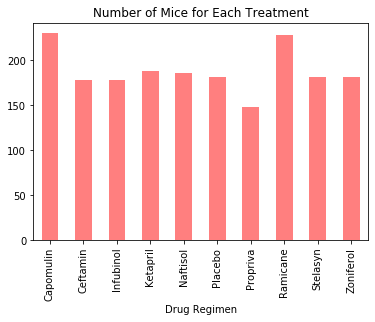

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

number_of_mice_per_treatment=single_summary_statistics_table.iloc[:,0]
number_of_mice_per_treatment.plot(kind='bar',title='Number of Mice for Each Treatment',color='r',alpha=.5)
plt.show()



In [11]:
Drug_Regimen=single_summary_statistics_table.reset_index().iloc[:,0].to_list()
Drug_Regimen

['Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol']

([<matplotlib.axis.XTick at 0x1a186912e8>,
 <a list of 10 Text xticklabel objects>)

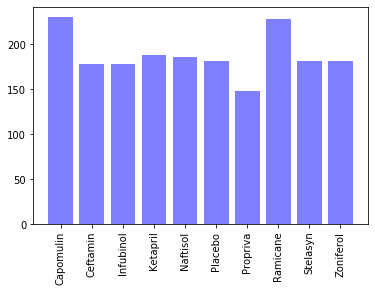

In [12]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
import numpy as np
Drug_Regimen=single_summary_statistics_table.reset_index().iloc[:,0].to_list()
x_axis=np.arange(len(Drug_Regimen))
plt.bar(x_axis,number_of_mice_per_treatment,color='b',alpha=.5)
plt.xticks(x_axis,['Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol'],rotation='vertical')

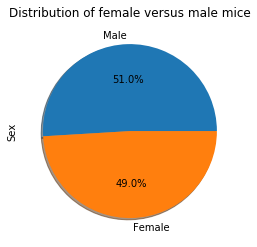

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

male_female=complete_data_clean['Sex'].value_counts()
male_female.plot(kind='pie',autopct='%1.1f%%',title='Distribution of female versus male mice',shadow=True)
plt.show()

/Users/nazila-entezari/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  if __name__ == '__main__':


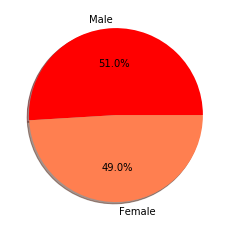

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
male_female

labels = male_female.reset_index().iloc[:,0]

# The values of each section of the pie chart
sizes = [male_female.reset_index().iloc[:,1]]
colors = ["red",'coral']
plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True)
plt.show()


## Quartiles, Outliers and Boxplots

In [15]:
complete_data_clean


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin:
# Start by getting the last (greatest) timepoint for each mouse

# create a new df showing the data for 4 treatments

new_df=complete_data_clean.set_index('Drug Regimen').loc[['Capomulin','Ramicane','Infubinol','Ceftamin'],:].sort_values('Mouse ID')
new_df
#getting the mouse Ids
MID=new_df['Mouse ID'].unique() 

final_tumor_size_list=[]
Regimen=[]
for i in MID:
    greatest_time_point=new_df.loc[new_df["Mouse ID"]==i].sort_values(by='Timepoint',ascending=False)
   
    final_tumor_size=round(greatest_time_point.iloc[0,2],2)
    final_tumor_size_list.append(final_tumor_size)
    
    Regimen.append(greatest_time_point.reset_index().iloc[0,0])
    
#create a new dataframe for the 4 specific treatments and final tumor size in each treament for each mice.
FTS=pd.DataFrame({"Mouse ID":MID,"Drug Regimen":Regimen,"Final Tumor Size":final_tumor_size_list})
FTS
# FTS_indexed=FTS.set_index('Mouse ID').sort_values('Drug Regimen')
# FTS_indexed

,Mouse ID,Drug Regimen,Final Tumor Size
0,a203,Infubinol,67.97
1,a251,Infubinol,65.53
2,a275,Ceftamin,63.00
3,a411,Ramicane,38.41
4,a444,Ramicane,43.05
...,...,...,...
95,y769,Ceftamin,68.59
96,y793,Capomulin,31.90
97,y865,Ceftamin,64.73
98,z578,Ramicane,30.64


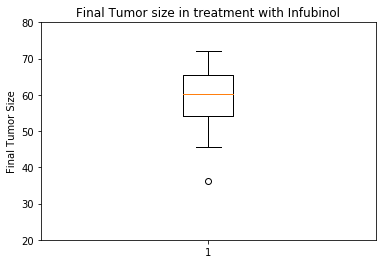

There are 1 outliers in the Final Tumor Size for the mice on Infubinol regimen! 


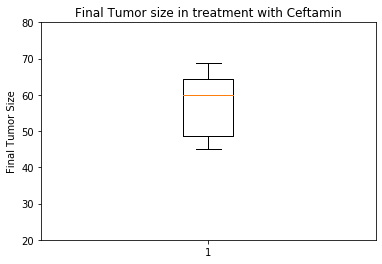

There are 0 outliers in the Final Tumor Size for the mice on Ceftamin regimen! 


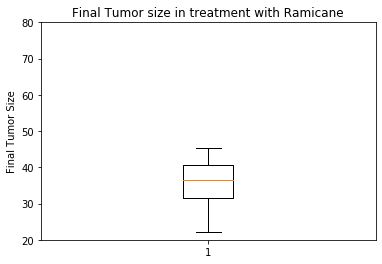

There are 0 outliers in the Final Tumor Size for the mice on Ramicane regimen! 


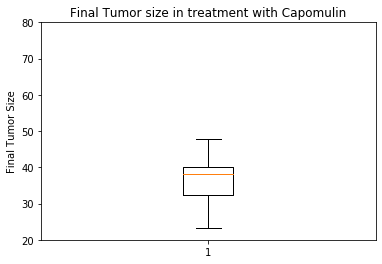

There are 0 outliers in the Final Tumor Size for the mice on Capomulin regimen! 


In [38]:
# Put treatments into a list for for loop (and later for plot labels)

treatment_list=FTS['Drug Regimen'].unique()
tumor_df=pd.DataFrame({treatment_list[0]:[],
                          treatment_list[1]:[],
                           treatment_list[2]:[],
                           treatment_list[3]:[]
                          })
tumor_df

tumor_vol_data=[] 
for d in treatment_list: 
    # Create empty list to fill with tumor vol data (for plotting)


  
#    Calculate the IQR and quantitatively determine if there are any potential outliers. 
    FTS_sorted=FTS.loc[FTS['Drug Regimen']==d].sort_values('Final Tumor Size')
    quartiles=FTS_sorted['Final Tumor Size'].quantile([.25,.5,.75])
    lower=quartiles[.25]
    upper=quartiles[.75]
    IQR=upper-lower
    tumor_vol_data.append(FTS_sorted['Final Tumor Size'])
#     tumor_df.loc[:,d]=[tumor_vol_data]
    plt.boxplot(FTS_sorted['Final Tumor Size'])
    plt.title(f'Final Tumor size in treatment with {d}')
    plt.ylabel('Final Tumor Size')
    plt.ylim(20,80)
    plt.show()
    outliers= FTS_sorted.loc[(FTS_sorted['Final Tumor Size']>1.5*IQR+upper) | (FTS_sorted['Final Tumor Size']<lower-1.5*IQR)]
    print(f'There are {len(outliers)} outliers in the Final Tumor Size for the mice on {d} regimen! ') 
    

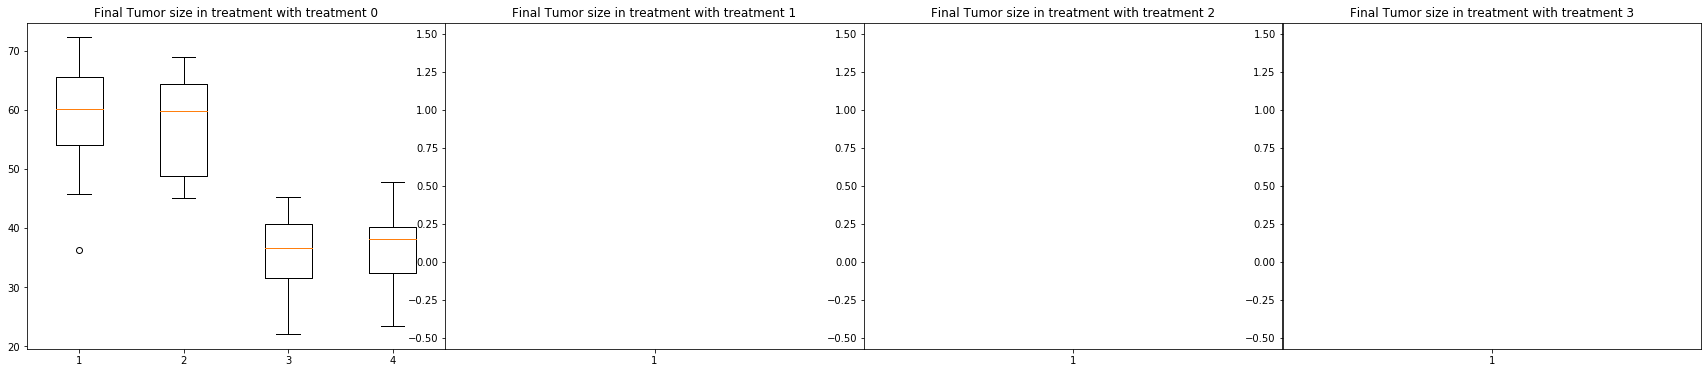

In [61]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
data =  [tumor_vol_data[0:24],tumor_vol_data[25:49],tumor_vol_data[50:74],tumor_vol_data[75:100]]
fig, axs = plt.subplots(1,4, figsize=(30, 6), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)
for i in range(4):
    axs[i].boxplot(data[i])
    axs[i].set_title(f'Final Tumor size in treatment with treatment {i}')
plt.show()

## Line and Scatter Plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_treated=complete_data_clean.set_index('Drug Regimen').loc['Capomulin',:].sort_values(['Mouse ID','Timepoint'])

capomulin_treated
single_mouse=capomulin_treated.iloc[0,0]
single_mouse
capomulin_mouse_df=capomulin_treated.loc[capomulin_treated.iloc[:,0]==single_mouse,:]
x_axis=capomulin_mouse_df.iloc[:,1]
tvol=capomulin_mouse_df.iloc[:,2]
plt.plot(x_axis,tvol)
plt.xlim(0,45)
plt.grid()
plt.xlabel('Timepoint')
plt.ylabel('Tumor Size')
plt.title('Tumor size in a single mouse vs Time points treated with Capomulin')
plt.show()


In [ ]:
capomulin_mouse_df.set_index("Timepoint").iloc[:,1:2].plot(kind='line',title=f'Tumor size in mouse id {single_mouse} vs Time points treated with capomulin')
plt.grid()
plt.xlim(0,45)
plt.show()


In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
average_tumor_wight=capomulin_treated.groupby('Mouse ID').mean()
x_values=average_tumor_wight.iloc[:,1]
y_values=average_tumor_wight.iloc[:,4]
plt.scatter(x=x_values,y=y_values,marker='+',c='r')
plt.grid()
plt.xlabel('Average Tumor Volume (mm3)')
plt.ylabel('Weight (g)')
plt.title('Mouse weight versus average Tumor volume for the Capomulin regimen')
plt.show()

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 

#linear regression model
from scipy.stats import linregress
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
plt.scatter(x=x_values,y=y_values,marker='+',c='r')
plt.grid()
plt.xlabel('Average Tumor Volume (mm3)')
plt.ylabel('Weight (g)')
plt.title('Mouse weight versus average Tumor volume for the Capomulin regimen')
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"b-")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(36,22),fontsize=15,color="blue")
plt.show()
 



In [ ]:
#correlation coefficientbetween mouse weight and average tumor volume for the Capomulin regimen
print(f'The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is {round(st.pearsonr(x_values,y_values)[0],2)}')